In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# 1. Load the data
df = pd.read_csv('C:\\Users\\Ali\\Desktop\\loan_data.csv')


In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# 2. Basic info about the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (9578, 14)


In [5]:
print("\nInfo of the dataset:")
print(df.info())



Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [6]:
print("\nStatistical summary:")
print(df.describe())



Statistical summary:
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.0144

In [7]:
# 3. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [8]:
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing values:")
print(missing_percent)



Percentage of missing values:
credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64


In [9]:
# 4. Clean categorical data in 'purpose' column
print("\nUnique values in 'purpose' before cleaning:")
print(df['purpose'].unique())



Unique values in 'purpose' before cleaning:
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [10]:
df['purpose'] = df['purpose'].str.lower().str.strip()

In [11]:
print("Unique values in 'purpose' after cleaning:")
print(df['purpose'].unique())

Unique values in 'purpose' after cleaning:
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [12]:
# 5. Convert categorical columns to numeric using one-hot encoding
print("\nUnique values in 'credit.policy':")
print(df['credit.policy'].unique())



Unique values in 'credit.policy':
[1 0]


In [13]:
print("Unique values in 'not.fully.paid':")
print(df['not.fully.paid'].unique())

Unique values in 'not.fully.paid':
[0 1]


In [14]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

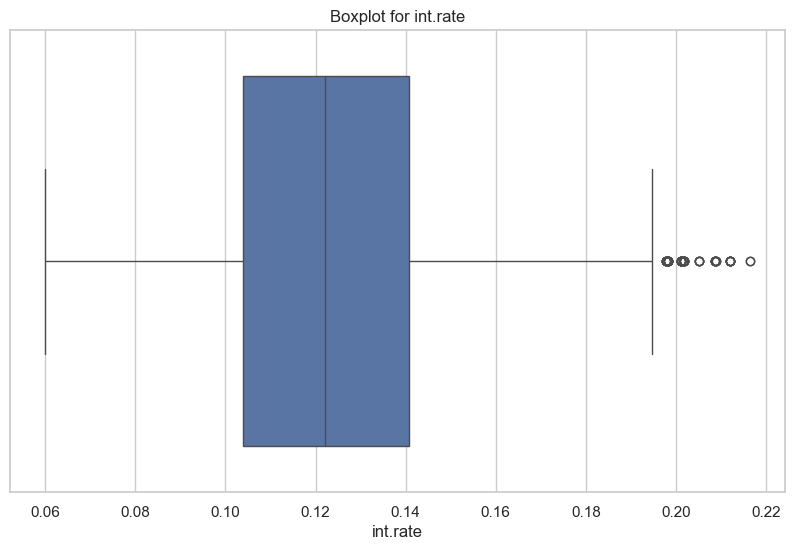

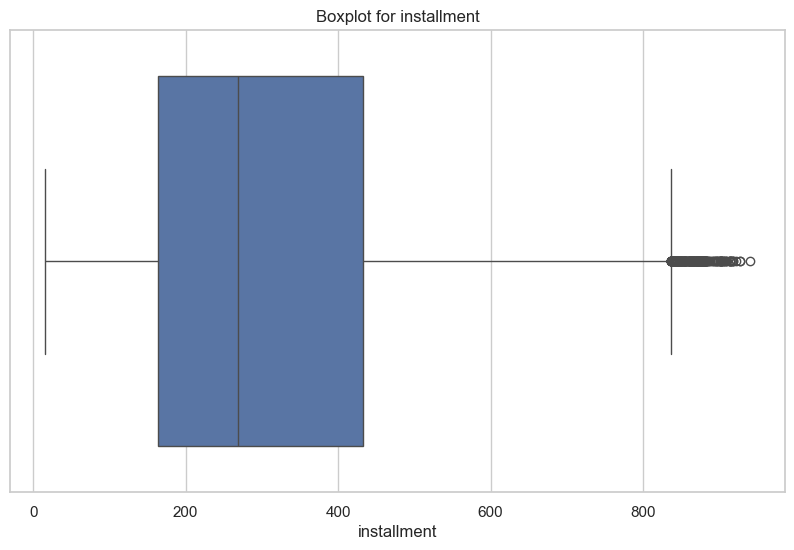

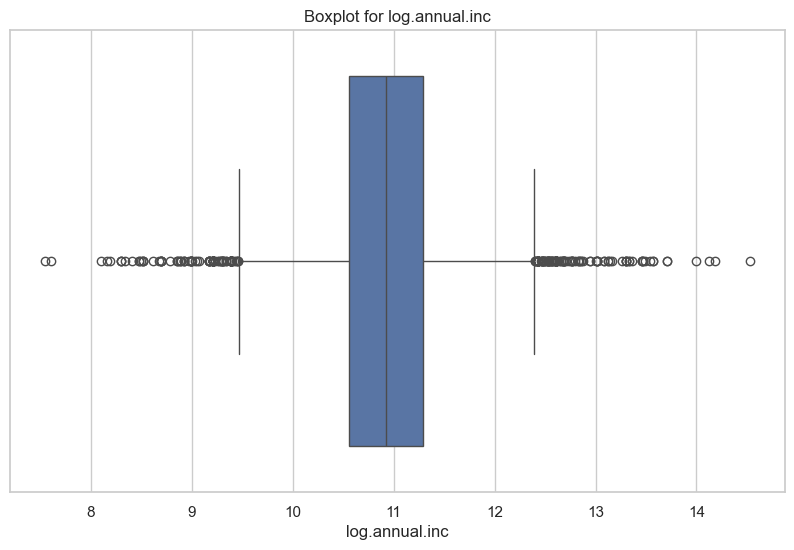

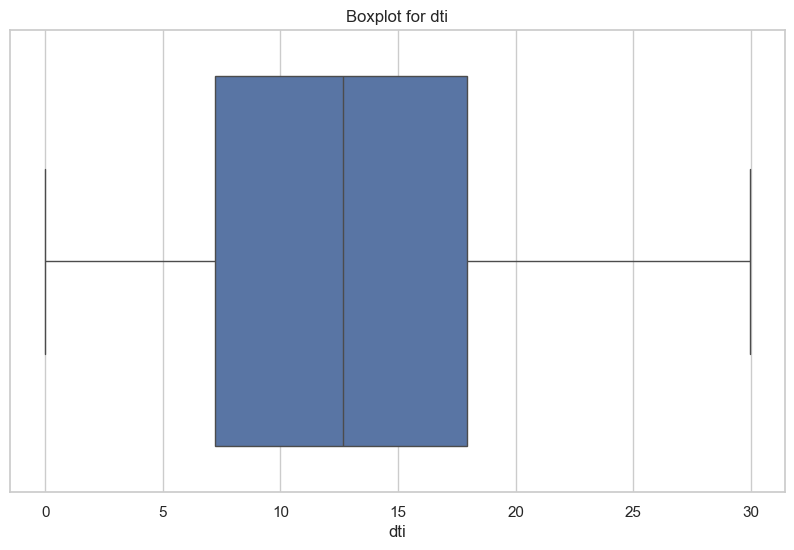

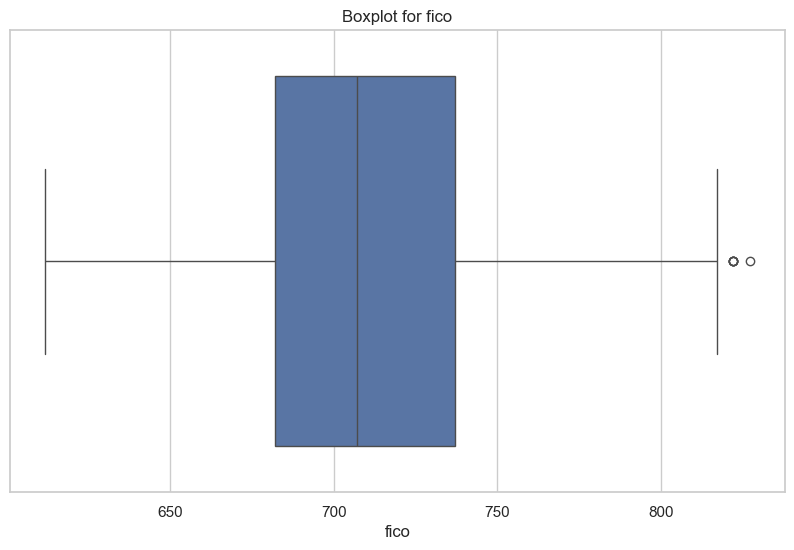

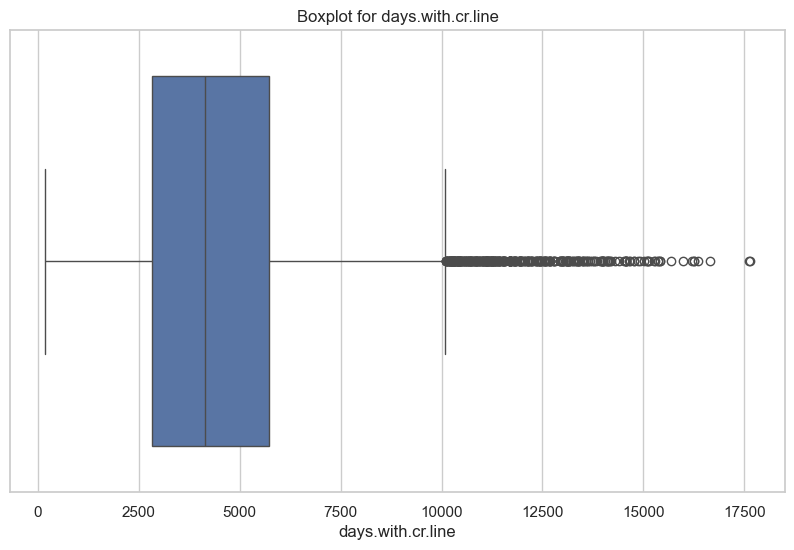

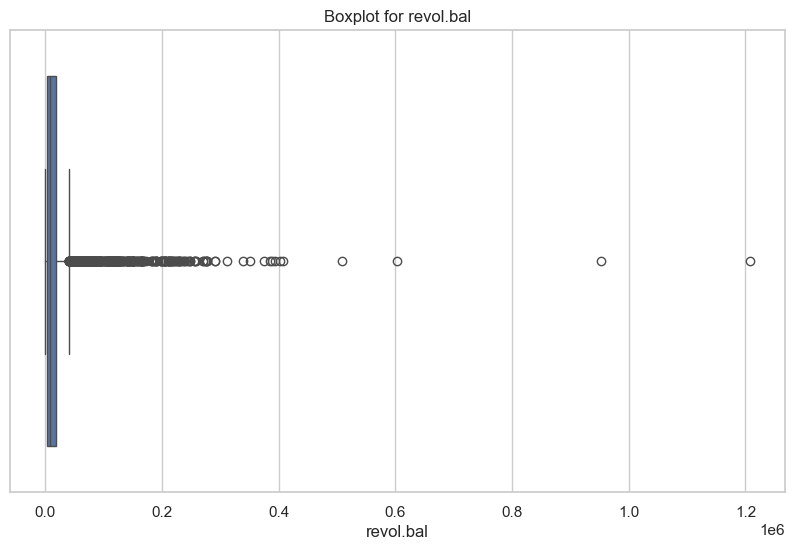

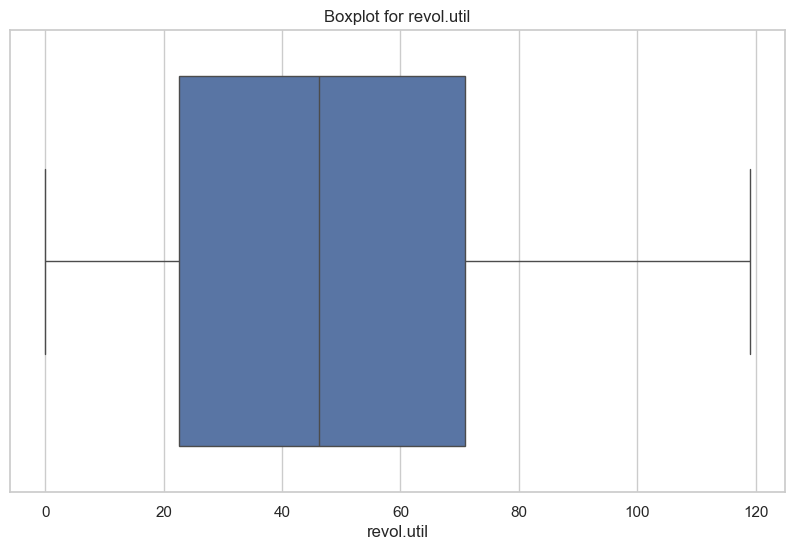

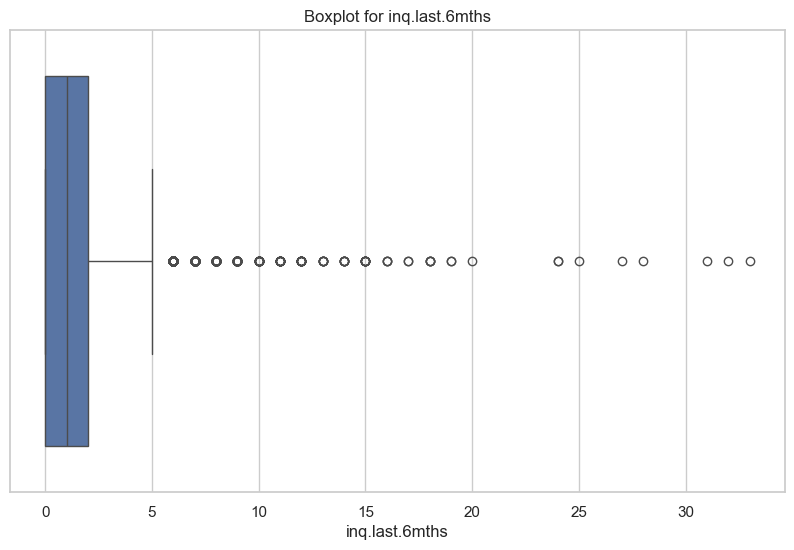

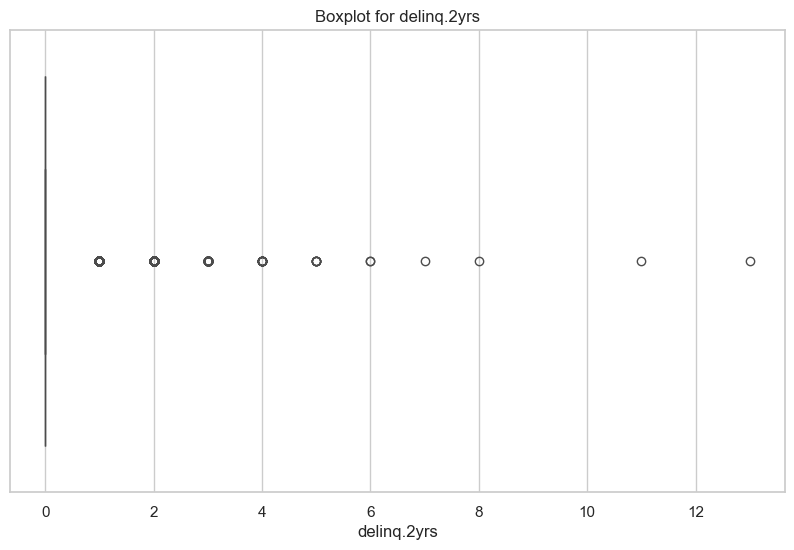

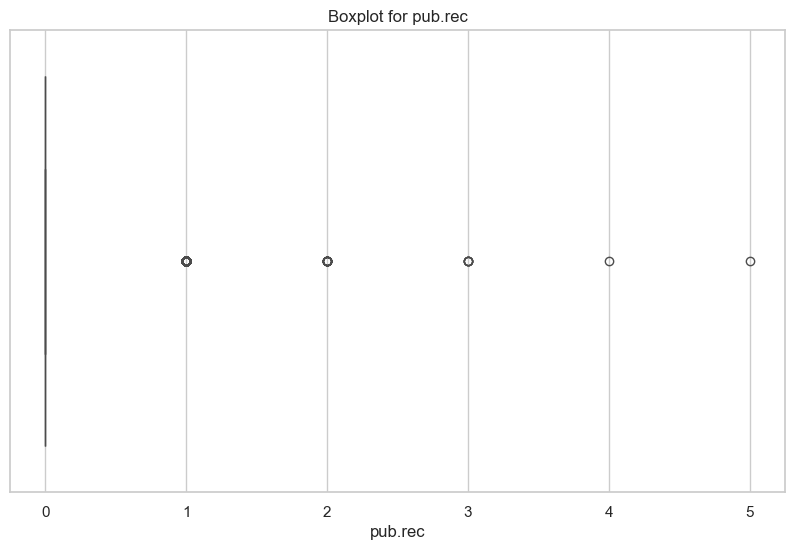

In [15]:
# 6. Detect outliers using boxplots
cols_for_outliers = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 
                     'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 
                     'delinq.2yrs', 'pub.rec']

for col in cols_for_outliers:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [16]:
# 7. Remove outliers based on IQR for selected numeric columns

def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = data.shape[0]
    data = data[(data[col] >= lower) & (data[col] <= upper)]
    after = data.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")
    return data

df = remove_outliers_iqr(df, 'fico')
df = remove_outliers_iqr(df, 'revol.bal')
df = remove_outliers_iqr(df, 'dti')

print(f"\nFinal shape of the data: {df.shape}")


Removed 6 outliers from 'fico'
Removed 779 outliers from 'revol.bal'
Removed 0 outliers from 'dti'

Final shape of the data: (8793, 19)


In [17]:
# 8. Clean column names: lower case, no spaces or dots
df.rename(columns=lambda x: x.strip().lower().replace('.', '_').replace(' ', '_'), inplace=True)

In [18]:
print("\nColumns after cleaning:")
print(df.columns)


Columns after cleaning:
Index(['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
       'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')


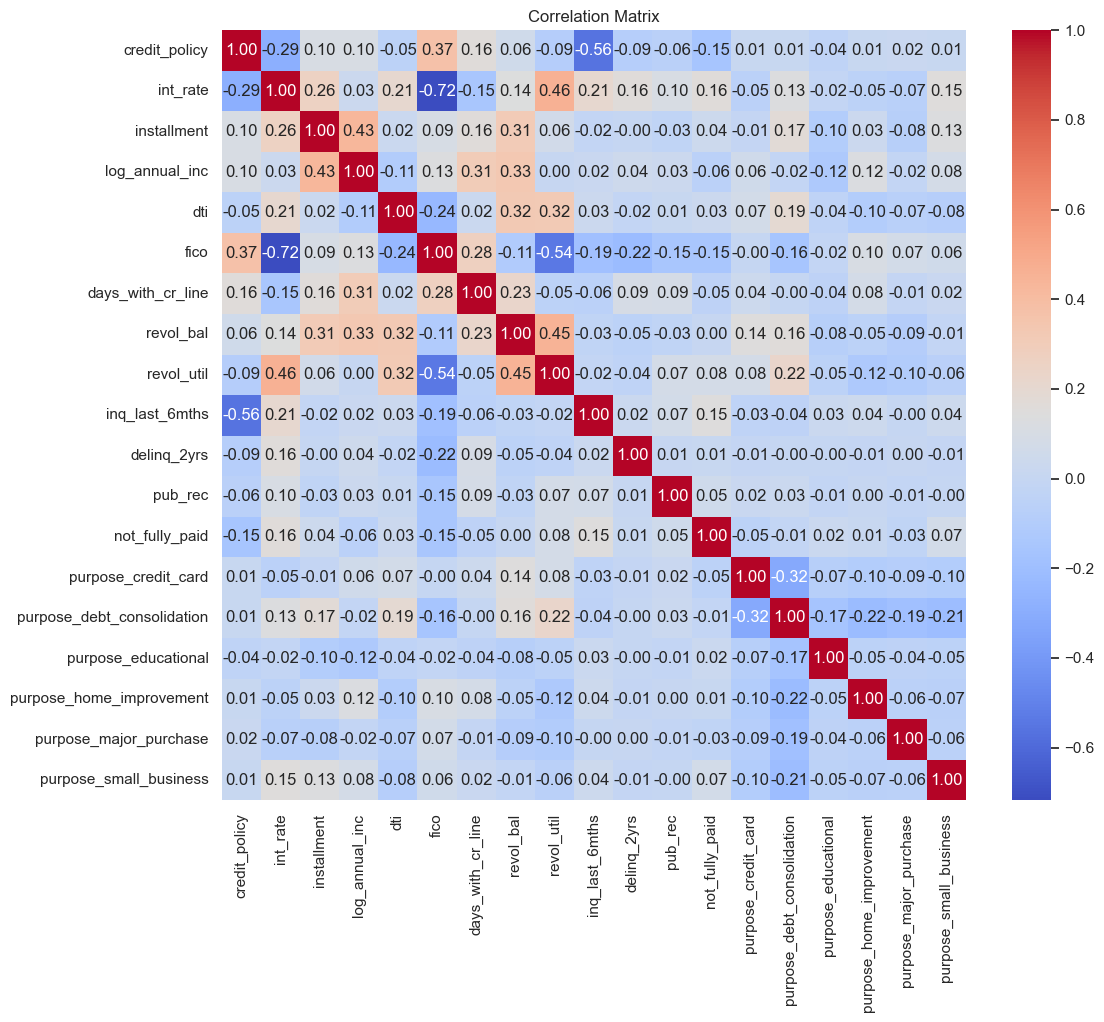

In [19]:
# 9. Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [20]:
# 10. Save the cleaned data
df.to_csv('loan_data_cleaned.csv', index=False)
print("Cleaned data saved to 'loan_data_cleaned.csv'.")


Cleaned data saved to 'loan_data_cleaned.csv'.
